In [1]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
# Testing the dataset 
path_single = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1.h5"
path_single_mask = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_1.h5"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


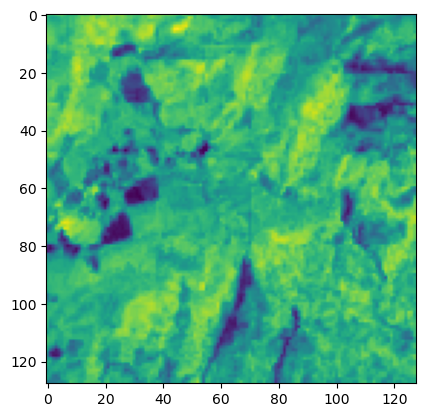

In [3]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


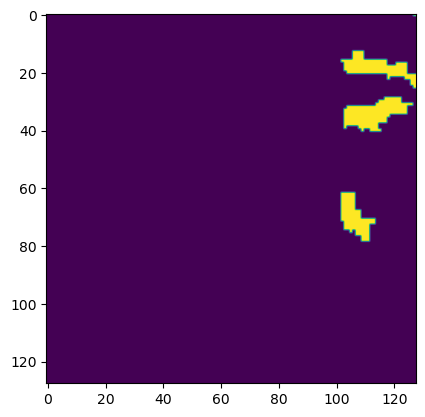

In [4]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [5]:
TRAIN_PATH = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\*.h5"
TRAIN_MASK = r'C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [6]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_1.h5
1 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_10.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_10.h5
2 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_100.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_100.h5
3 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1000.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_1000.h5
4 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1001.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_

C:\Users\satee\AppData\Local\Temp\ipykernel_2540\3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1676 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2507.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_2507.h5
1677 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2508.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_2508.h5
1678 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2509.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_2509.h5
1679 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_251.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_251.h5
1680 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2510.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\arc

C:\Users\satee\AppData\Local\Temp\ipykernel_2540\3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2267 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3039.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_3039.h5
2268 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_304.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_304.h5
2269 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3040.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_3040.h5
2270 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3041.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_3041.h5
2271 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3042.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\arc

121 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1107.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1107.h5
122 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1108.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1108.h5
123 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1109.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1109.h5
124 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_111.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_111.h5
125 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1110.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1110.h5
126 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1111.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1111.h5
127 C:

138 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1122.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1122.h5
139 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1123.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1123.h5
140 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1124.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1124.h5
141 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1125.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1125.h5
142 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1126.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1126.h5
143 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1127.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1127.h5
144 

176 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1157.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1157.h5
177 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1158.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1158.h5
178 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1159.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1159.h5
179 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_116.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_116.h5
180 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1160.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1160.h5
181 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1161.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1161.h5
182 C:

193 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1172.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1172.h5
194 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1173.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1173.h5
195 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1174.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1174.h5
196 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1175.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1175.h5
197 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1176.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1176.h5
198 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1177.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1177.h5
199 

230 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1205.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1205.h5
231 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1206.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1206.h5
232 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1207.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1207.h5
233 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1208.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1208.h5
234 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1209.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1209.h5
235 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_121.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_121.h5
236 C:

246 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_122.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_122.h5
247 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1220.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1220.h5
248 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1221.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1221.h5
249 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1222.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1222.h5
250 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1223.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1223.h5
251 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1224.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1224.h5
252 C:

283 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1253.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1253.h5
284 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1254.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1254.h5
285 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1255.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1255.h5
286 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1256.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1256.h5
287 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1257.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1257.h5
288 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1258.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1258.h5
289 

301 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_127.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_127.h5
302 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1270.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1270.h5
303 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1271.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1271.h5
304 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1272.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1272.h5
305 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1273.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1273.h5
306 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1274.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1274.h5
307 C:

336 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1300.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1300.h5
337 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1301.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1301.h5
338 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1302.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1302.h5
339 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1303.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1303.h5
340 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1304.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1304.h5
341 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1305.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1305.h5
342 

354 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1317.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1317.h5
355 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1318.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1318.h5
356 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1319.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1319.h5
357 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_132.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_132.h5
358 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1320.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1320.h5
359 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1321.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1321.h5
360 C:

386 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1346.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1346.h5
387 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1347.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1347.h5
388 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1348.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1348.h5
389 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1349.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1349.h5
390 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_135.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_135.h5
391 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1350.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1350.h5
392 C:

420 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1377.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1377.h5
421 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1378.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1378.h5
422 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1379.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1379.h5
423 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_138.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_138.h5
424 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1380.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1380.h5
425 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1381.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1381.h5
426 C:

446 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_140.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_140.h5
447 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1400.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1400.h5
448 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1401.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1401.h5
449 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1402.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1402.h5
450 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1403.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1403.h5
451 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1404.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1404.h5
446 C:

471 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1422.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1422.h5
472 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1423.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1423.h5
473 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1424.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1424.h5
474 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1425.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1425.h5
475 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1426.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1426.h5
476 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1427.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1427.h5
471 

497 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1446.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1446.h5
498 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1447.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1447.h5
499 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1448.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1448.h5
500 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1449.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1449.h5
501 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_145.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_145.h5
502 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1450.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1450.h5
503 C:

522 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1469.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1469.h5
523 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_147.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_147.h5
524 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1470.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1470.h5
525 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1471.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1471.h5
526 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1472.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1472.h5
527 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1473.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1473.h5
522 C:

545 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_149.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_149.h5
546 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1490.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1490.h5
547 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1491.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1491.h5
548 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1492.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1492.h5
549 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1493.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1493.h5
550 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1494.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1494.h5
551 C:

570 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1511.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1511.h5
571 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1512.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1512.h5
572 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1513.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1513.h5
573 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1514.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1514.h5
574 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1515.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1515.h5
575 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1516.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1516.h5
576 

598 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1537.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1537.h5
599 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1538.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1538.h5
600 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1539.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1539.h5
601 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_154.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_154.h5
598 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1537.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1537.h5
599 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1538.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1538.h5
600 C:

624 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1560.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1560.h5
625 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1561.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1561.h5
626 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1562.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1562.h5
627 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1563.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1563.h5
624 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1560.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1560.h5
625 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1561.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1561.h5
626 

649 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1583.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1583.h5
650 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1584.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1584.h5
651 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1585.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1585.h5
652 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1586.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1586.h5
653 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1587.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1587.h5
654 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1588.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1588.h5
649 

673 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1604.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1604.h5
674 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1605.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1605.h5
675 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1606.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1606.h5
676 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1607.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1607.h5
677 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1608.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1608.h5
678 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1609.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1609.h5
677 

701 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_163.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_163.h5
702 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1630.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1630.h5
703 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1631.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1631.h5
704 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1632.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1632.h5
701 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_163.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_163.h5
702 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1630.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1630.h5
703 C:\s

724 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1650.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1650.h5
725 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1651.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1651.h5
726 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1652.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1652.h5
727 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1653.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1653.h5
728 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1654.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1654.h5
729 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1655.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1655.h5
730 

751 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1675.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1675.h5
752 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1676.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1676.h5
753 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1677.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1677.h5
754 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1678.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1678.h5
751 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1675.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1675.h5
752 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1676.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1676.h5
753 

776 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1698.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1698.h5
777 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1699.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1699.h5
778 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_17.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_17.h5
776 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1698.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1698.h5
777 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1699.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1699.h5
778 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_17.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_17.h5
779 C:\share

802 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1720.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1720.h5
803 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1721.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1721.h5
804 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1722.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1722.h5
805 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1723.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1723.h5
806 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1724.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1724.h5
802 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1720.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1720.h5
803 

829 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1745.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1745.h5
830 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1746.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1746.h5
831 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1747.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1747.h5
832 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1748.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1748.h5
829 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1745.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1745.h5
830 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1746.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1746.h5
831 

855 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1769.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1769.h5
856 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_177.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_177.h5
857 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1770.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1770.h5
858 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1771.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1771.h5
855 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1769.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1769.h5
856 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_177.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_177.h5
857 C:\s

880 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1791.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1791.h5
881 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1792.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1792.h5
880 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1791.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1791.h5
881 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1792.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1792.h5
882 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1793.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1793.h5
883 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1794.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1794.h5
884 

904 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1812.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1812.h5
905 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1813.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1813.h5
906 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1814.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1814.h5
907 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1815.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1815.h5
908 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1816.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1816.h5
909 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1817.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1817.h5
910 

932 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1838.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1838.h5
933 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1839.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1839.h5
934 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_184.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_184.h5
935 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1840.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1840.h5
932 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1838.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1838.h5
933 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1839.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1839.h5
934 C:

955 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1859.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1859.h5
956 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_186.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_186.h5
957 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1860.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1860.h5
958 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1861.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1861.h5
959 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1862.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1862.h5
960 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1863.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1863.h5
961 C:

983 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1884.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1884.h5
984 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1885.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1885.h5
985 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1886.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1886.h5
983 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1884.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1884.h5
984 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1885.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1885.h5
985 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1886.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1886.h5
986 

1009 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1907.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1907.h5
1010 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1908.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1908.h5
1011 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1909.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1909.h5
1012 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_191.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_191.h5
1009 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1907.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1907.h5
1010 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1908.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1908.h5


1034 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_193.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_193.h5
1035 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1930.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1930.h5
1036 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1931.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1931.h5
1037 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1932.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1932.h5
1034 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_193.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_193.h5
1035 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1930.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1930.h5
10

1060 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1953.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1953.h5
1061 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1954.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1954.h5
1062 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1955.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1955.h5
1060 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1953.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1953.h5
1061 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1954.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1954.h5
1062 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1955.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1955.h

1084 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1975.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1975.h5
1085 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1976.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1976.h5
1086 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1977.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1977.h5
1087 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1978.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1978.h5
1088 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_1979.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_1979.h5
1089 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_198.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_198.h5


1111 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2.h5
1112 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_20.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_20.h5
1113 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_200.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_200.h5
1114 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2000.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2000.h5
1115 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2001.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2001.h5
1111 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2.h5
1112 C:\shared d

1134 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2019.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2019.h5
1135 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_202.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_202.h5
1136 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2020.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2020.h5
1137 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2021.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2021.h5
1138 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2022.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2022.h5
1139 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2023.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2023.h5


1161 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2043.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2043.h5
1162 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2044.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2044.h5
1161 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2043.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2043.h5
1162 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2044.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2044.h5
1163 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2045.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2045.h5
1164 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2046.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2046.h

1187 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2067.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2067.h5
1188 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2068.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2068.h5
1189 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2069.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2069.h5
1190 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_207.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_207.h5
1187 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2067.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2067.h5
1188 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2068.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2068.h5


1212 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_209.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_209.h5
1213 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2090.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2090.h5
1214 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2091.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2091.h5
1215 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2092.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2092.h5
1212 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_209.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_209.h5
1213 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2090.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2090.h5
12

1238 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2112.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2112.h5
1239 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2113.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2113.h5
1240 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2114.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2114.h5
1238 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2112.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2112.h5
1239 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2113.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2113.h5
1240 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2114.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2114.h

1263 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2135.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2135.h5
1264 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2136.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2136.h5
1265 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2137.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2137.h5
1266 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2138.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2138.h5
1263 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2135.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2135.h5
1264 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2136.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2136.h

1288 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2158.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2158.h5
1289 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2159.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2159.h5
1290 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_216.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_216.h5
1288 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2158.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2158.h5
1289 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2159.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2159.h5
1290 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_216.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_216.h5
12

1313 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2180.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2180.h5
1314 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2181.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2181.h5
1315 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2182.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2182.h5
1316 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2183.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2183.h5
1313 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2180.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2180.h5
1314 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2181.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2181.h

1337 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2201.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2201.h5
1338 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2202.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2202.h5
1339 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2203.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2203.h5
1340 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2204.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2204.h5
1341 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2205.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2205.h5
1342 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2206.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2206.h

1363 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2225.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2225.h5
1364 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2226.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2226.h5
1365 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2227.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2227.h5
1366 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2228.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2228.h5
1367 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2229.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2229.h5
1368 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_223.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_223.h5


1391 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2250.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2250.h5
1392 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2251.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2251.h5
1393 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2252.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2252.h5
1391 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2250.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2250.h5
1392 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2251.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2251.h5
1393 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2252.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2252.h

1416 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2273.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2273.h5
1417 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2274.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2274.h5
1418 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2275.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2275.h5
1419 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2276.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2276.h5
1416 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2273.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2273.h5
1417 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2274.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2274.h

1441 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2296.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2296.h5
1442 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2297.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2297.h5
1443 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2298.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2298.h5
1444 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2299.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2299.h5
1441 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2296.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2296.h5
1442 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2297.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2297.h

1466 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2318.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2318.h5
1467 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2319.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2319.h5
1468 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_232.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_232.h5
1469 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2320.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2320.h5
1466 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2318.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2318.h5
1467 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2319.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2319.h5


In [7]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


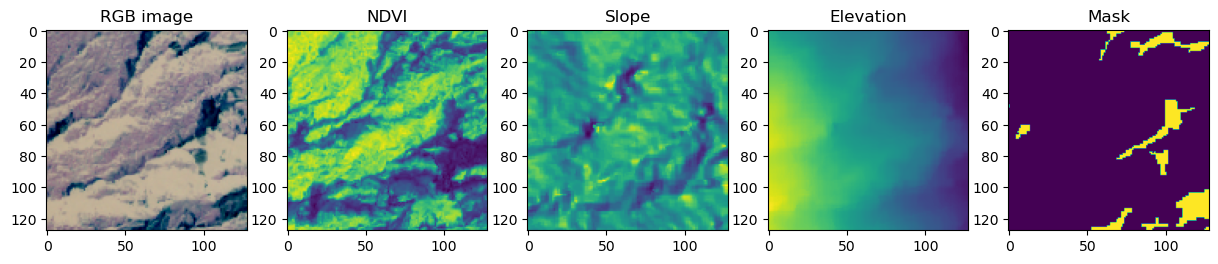

In [8]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.4, shuffle=True)

x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


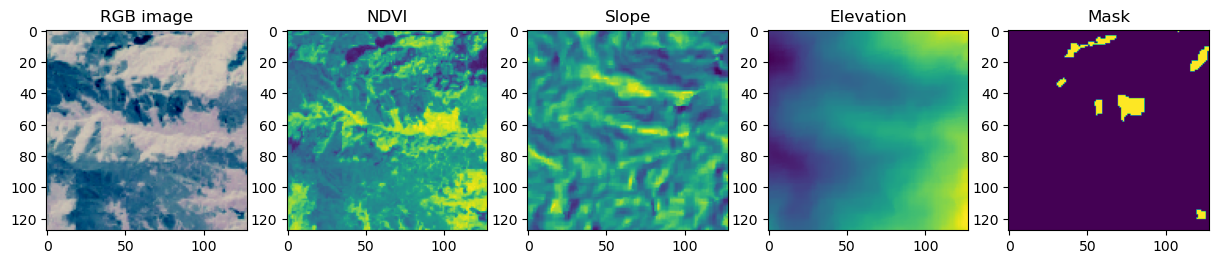

In [10]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [11]:
x_train.shape, y_train.shape

((2279, 128, 128, 6), (2279, 128, 128, 1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


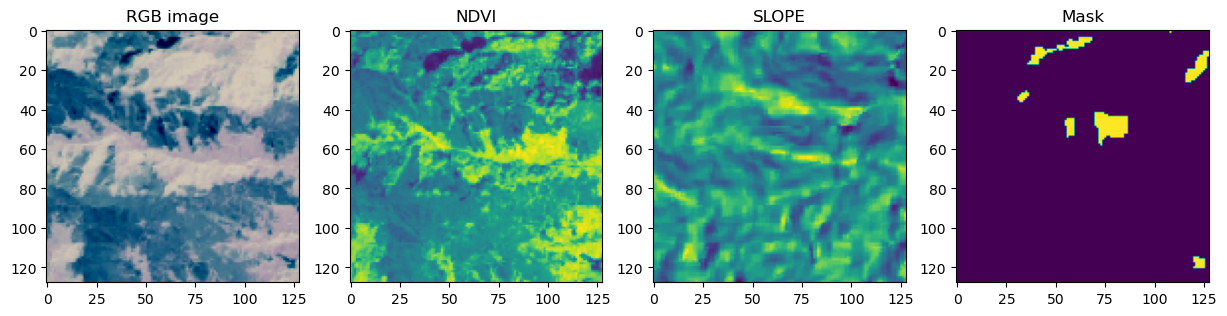

In [13]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [14]:
import sys
sys.path.append(r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\landslide4sense-solution-main\landslide4sense-solution-main\utils\utils.py")

In [15]:
import tensorflow as tf
from utils import recall_m, precision_m, f1_m

def resunet_model(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    # Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.BatchNormalization()(c1)  
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.BatchNormalization()(c2)  # Added BatchNormalization
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.BatchNormalization()(c3)  # Added BatchNormalization
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.BatchNormalization()(c4)  # Added BatchNormalization
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.BatchNormalization()(c5)  # Added BatchNormalization
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Residual blocks
    r1 = tf.keras.layers.Conv2D(256, (1, 1), activation=None, kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.add([c5, r1])
    c5 = tf.keras.layers.Activation('relu')(c5)

    r2 = tf.keras.layers.Conv2D(128, (1, 1), activation=None, kernel_initializer='he_normal', padding='same')(p3)
    c6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    c6 = tf.keras.layers.add([c6, r2])
    c6 = tf.keras.layers.Activation('relu')(c6)

    r3 = tf.keras.layers.Conv2D(64, (1, 1), activation=None, kernel_initializer='he_normal', padding='same')(p2)
    c7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    c7 = tf.keras.layers.add([c7, r3])
    c7 = tf.keras.layers.Activation('relu')(c7)

    r4 = tf.keras.layers.Conv2D(32, (1, 1), activation=None, kernel_initializer='he_normal', padding='same')(p1)
    c8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    c8 = tf.keras.layers.add([c8, r4])
    c8 = tf.keras.layers.Activation('relu')(c8)

    # Expansive path
    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

    return model


In [16]:

model = resunet_model(128, 128, 6)
# model.summary()

# ModelCheckpoint to save the best model based on validation performance
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_resUnet.h5.keras",
    monitor="val_f1_m",  # You might need to define the metric function 'f1_m' for this
    verbose=1,
    save_best_only=True,
    mode="max"
)

# List of callbacks
callbacks = [
    checkpointer
]

# Train the model on train and validation data
history = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=60,
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=callbacks
)

# Save the model
model.save("model_save_resUnet.keras")


Epoch 1/60

Epoch 1: val_f1_m improved from -inf to 0.18662, saving model to C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_resUnet.h5.keras
143/143 - 95s - 663ms/step - accuracy: 0.9743 - f1_m: 0.2976 - loss: 0.0715 - precision_m: 0.5912 - recall_m: 0.2300 - val_accuracy: 0.9766 - val_f1_m: 0.1866 - val_loss: 0.0623 - val_precision_m: 0.8560 - val_recall_m: 0.1080
Epoch 2/60

Epoch 2: val_f1_m did not improve from 0.18662
143/143 - 62s - 433ms/step - accuracy: 0.9825 - f1_m: 0.5517 - loss: 0.0454 - precision_m: 0.6615 - recall_m: 0.4983 - val_accuracy: 0.9764 - val_f1_m: 0.1564 - val_loss: 0.1114 - val_precision_m: 0.9331 - val_recall_m: 0.0883
Epoch 3/60

Epoch 3: val_f1_m improved from 0.18662 to 0.38488, saving model to C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_resUnet.h5.keras
143/143 - 6

In [17]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)


0.043809860944747925 0.9861588478088379 0.6915395259857178 0.7545916438102722 0.641404926776886


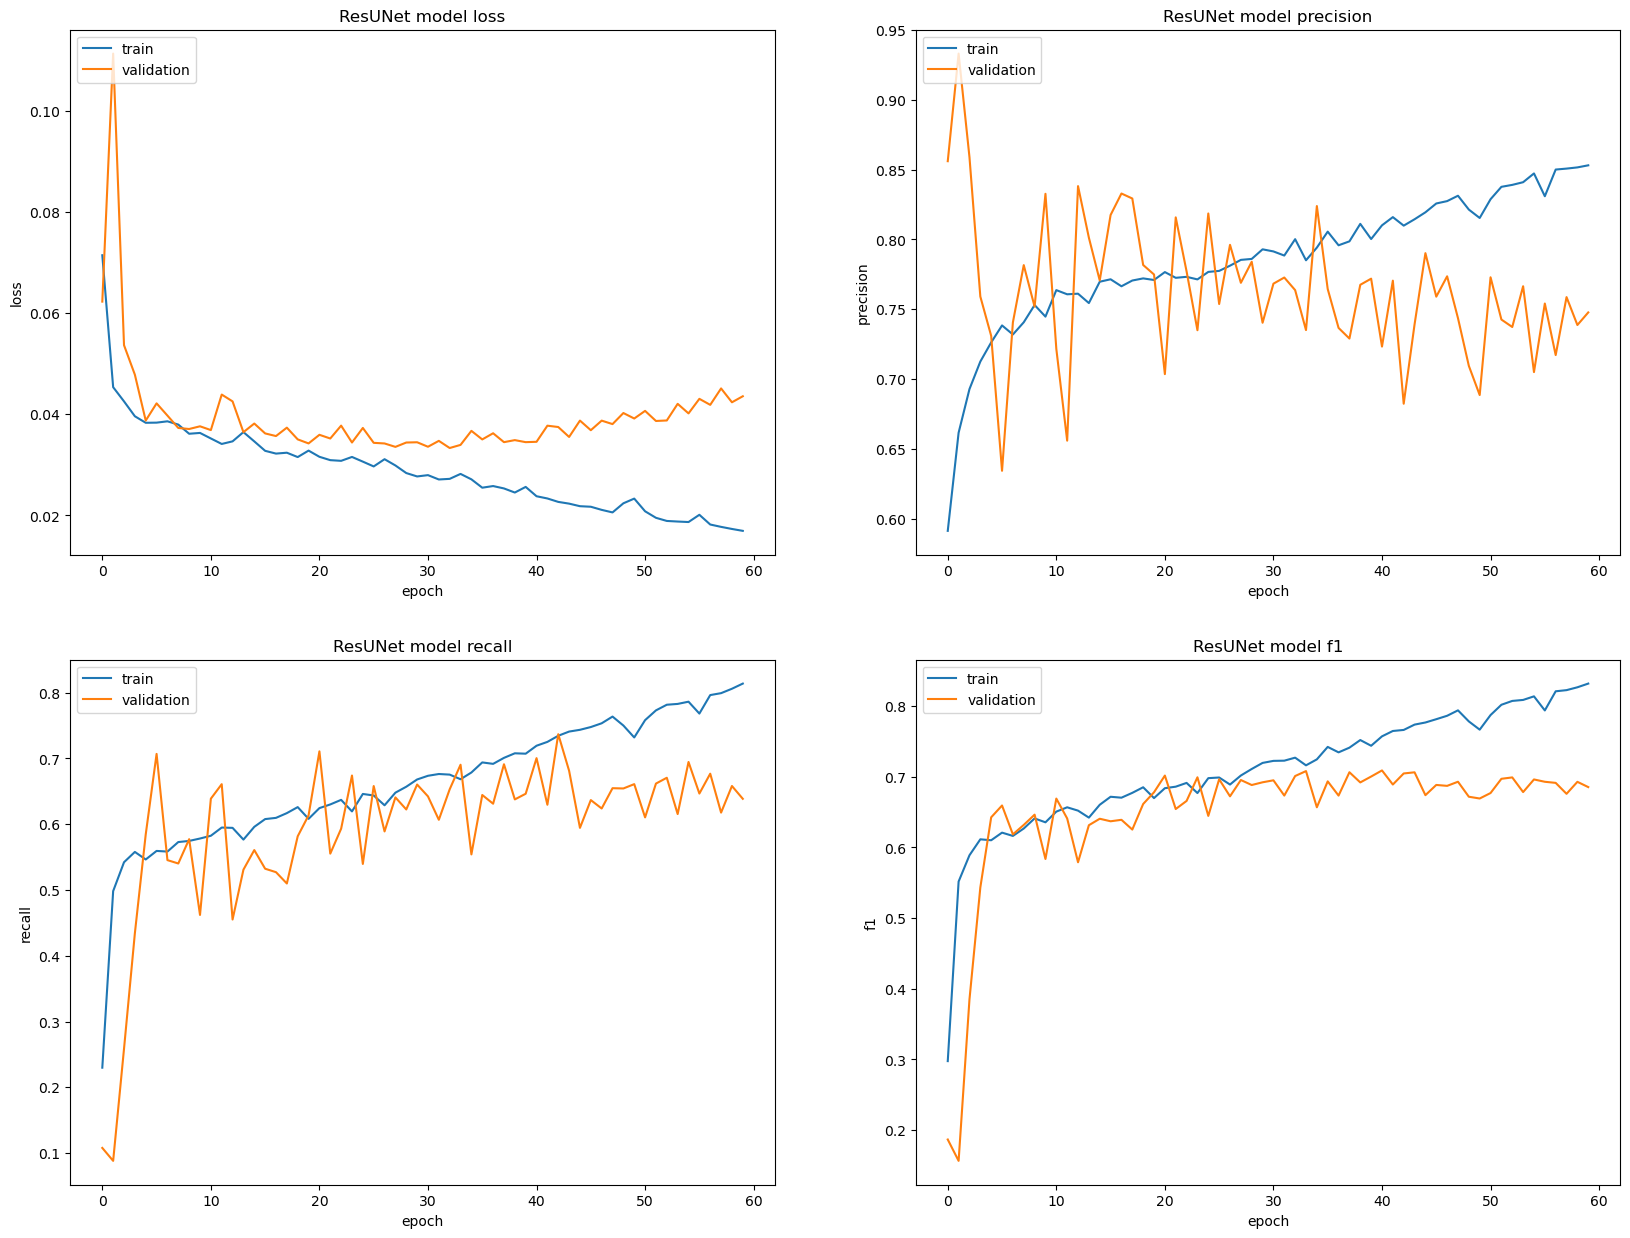

In [18]:
fig, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, figsize=(20, 15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('ResUNet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('ResUNet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('ResUNet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('ResUNet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [63]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import precision_recall_curve

def calculate_iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / union
    return iou

# Evaluate on test set (assuming model has already been trained)
loss = model.evaluate(x_test, y_test, verbose=2)

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions and ground truth to binary arrays
threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = (y_pred > threshold).astype(np.uint8)
y_test_binary = y_test.astype(np.uint8)

# Calculate precision, recall, f1_score for each class
precision = precision_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
recall = recall_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
f1_score_val = f1_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')

# Calculate IOU (Intersection over Union)
iou = calculate_iou(y_test_binary.flatten(), y_pred_binary.flatten())

# Calculate Mean Average Precision (mAP)
# Assuming y_test_binary and y_pred_binary are in the right shape for mAP calculation
n_classes = y_test.shape[-1]  # Number of classes
average_precisions = []
for i in range(n_classes):
    average_precisions.append(average_precision_score(y_test_binary[:, :, i].flatten(), y_pred_binary[:, :, i].flatten()))

mAP = np.mean(average_precisions)

print("Test Metrics:")
print("Loss:", loss)
print("F1 Score:", f1_score_val)
print("Precision:", precision)
print("Recall:", recall)
print("IOU:", iou)


24/24 - 6s - 246ms/step - accuracy: 0.9880 - f1_m: 0.6825 - loss: 0.0390 - precision_m: 0.7331 - recall_m: 0.6407
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step
Test Metrics:
Loss: [0.039016127586364746, 0.987960159778595, 0.6825485229492188, 0.7330893874168396, 0.6406747698783875]
F1 Score: 0.9875324071191458
Precision: 0.9872618708696606
Recall: 0.9879601729543586
IOU: 0.5288220078761192


In [30]:
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt

# Load test images with numerical sequences
test_url = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TestData\img\*.h5"
img_test = sorted(glob.glob(test_url))

TEST_XX = np.zeros((800, 128, 128, 6))  # Assuming 800 images
for i, img in enumerate(img_test, start=1):
    with h5py.File(img, 'r') as hdf:
        data = np.array(hdf.get('img'))

        # Assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # Normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # NDVI calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        denominator = np.add(data_nir, data_red)
        data_ndvi = np.zeros_like(data_red)
        non_zero_indices = denominator != 0
        data_ndvi[non_zero_indices] = np.divide(data_nir[non_zero_indices] - data_red[non_zero_indices], denominator[non_zero_indices])

        # Final array
        TEST_XX[i - 1, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  # RED
        TEST_XX[i - 1, :, :, 1] = 1 - data[:, :, 2] / mid_rgb  # GREEN
        TEST_XX[i - 1, :, :, 2] = 1 - data[:, :, 1] / mid_rgb  # BLUE
        TEST_XX[i - 1, :, :, 3] = data_ndvi  # NDVI
        TEST_XX[i - 1, :, :, 4] = 1 - data[:, :, 13] / mid_slope  # SLOPE
        TEST_XX[i - 1, :, :, 5] = 1 - data[:, :, 13] / mid_elevation  # ELEVATION

# Assuming 'model' is your trained model
threshold = 0.5
pred_img = model.predict(TEST_XX)
pred_img = (pred_img > threshold).astype(np.uint8)



25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


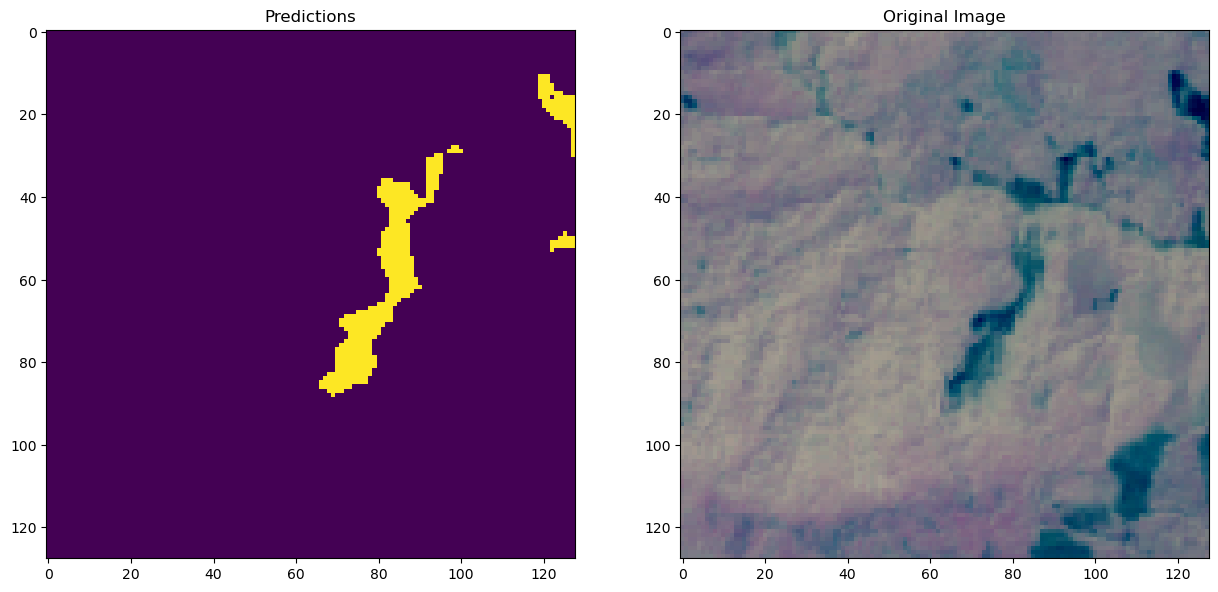

In [65]:
# Plot example prediction and corresponding image
img = 750
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(TEST_XX[img, :, :, 0:3])
ax2.set_title('Original Image')
plt.show()
